## Cupcakes da Bel

Ingredientes da Receita de Cupcakes (rende 12 porções):

430g de farinha

130g de chocolate

4 ovos

150g de manteiga

200g de açúcar

5g de fermento

#### Verificar se a variação na quantidade de farinha ou chocolate altera o rendimento (porções)

In [2]:
import pandas as pd 

In [3]:
import numpy as np

### Planejamento fatorial - analisando todas as vértices da área experimental

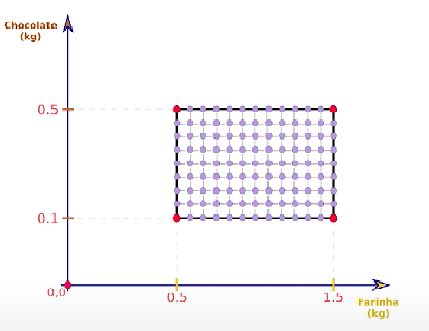

### Tabela dos pontos experimentais x quantidade produzida de acordo com o ponto

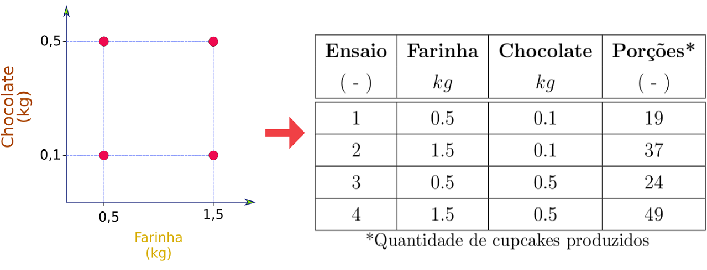

Construindo uma matriz representando todos os ensaios realizados:

In [4]:
ensaios = np.array([ [-1,-1], [1,-1], [-1,1], [1,1]])

### pyDOE2

In [8]:
import pyDOE2 as doe

### Costruindo um planejamento fatorial de 2²

In [9]:
ensaios  = doe.ff2n(2)

In [10]:
ensaios

array([[-1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1.,  1.]])

### Incerindo o planejamento em um Data Frame

In [11]:
experimento = pd.DataFrame(ensaios, columns = ['Farinha', 'Chocolate'])

### Inserindo coluna com os resultados

In [12]:
experimento['Porcoes'] = [19, 37, 24, 49]

In [13]:
experimento

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49


Conclusão: Temos, por fim, nosso experimento representado por um DataFrame do Pandas. Usaremos este DataFrame para iniciarmos a análise do nosso experimento.



### Analisando graficamente o experimento

In [14]:
import seaborn as sns

In [17]:
# paletas -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('terrain')

# estilo -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('darkgrid')

### Para a farinha

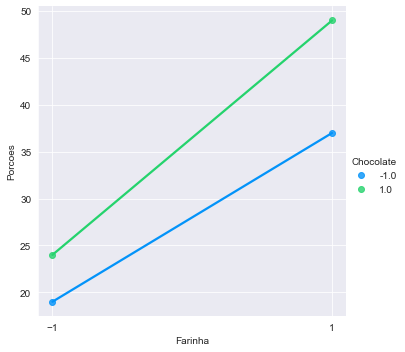

In [18]:
ax1 = sns.lmplot(data=experimento, x='Farinha', y='Porcoes', ci=None, hue='Chocolate')
ax1.set(xticks = (-1,1))

### Para o chocolate

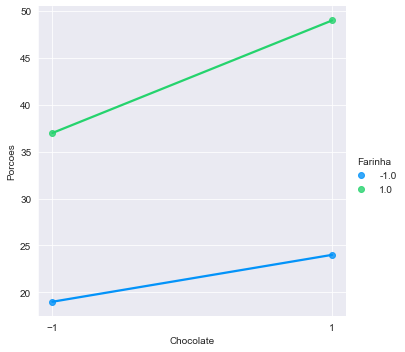

In [19]:
ax2 = sns.lmplot(data=experimento, x='Chocolate', y='Porcoes', ci=None, hue='Farinha')
ax2.set(xticks = (-1,1))

### Ajustando o modelo estatístico

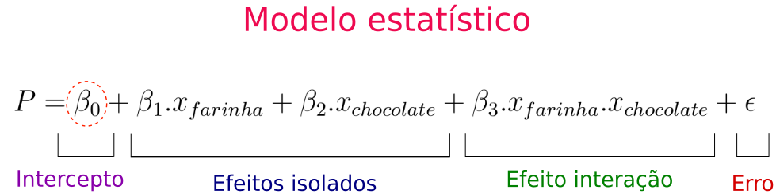

In [20]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf

In [21]:
modelo = smf.ols(data = experimento, formula = 'Porcoes ~ Farinha + Chocolate + Farinha:Chocolate')

In [22]:
modelo_ajustado = modelo.fit()

In [23]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 26 Jun 2022   Prob (F-statistic):                nan
Time:                        16:38:51   Log-Likelihood:                    inf
No. Observations:                   4   AIC:                              -inf
Df Residuals:                       0   BIC:                              -inf
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            32.2500        na

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:50: RuntimeWarning: invalid value encountered in d

### Aumentando os Graus de liberdade

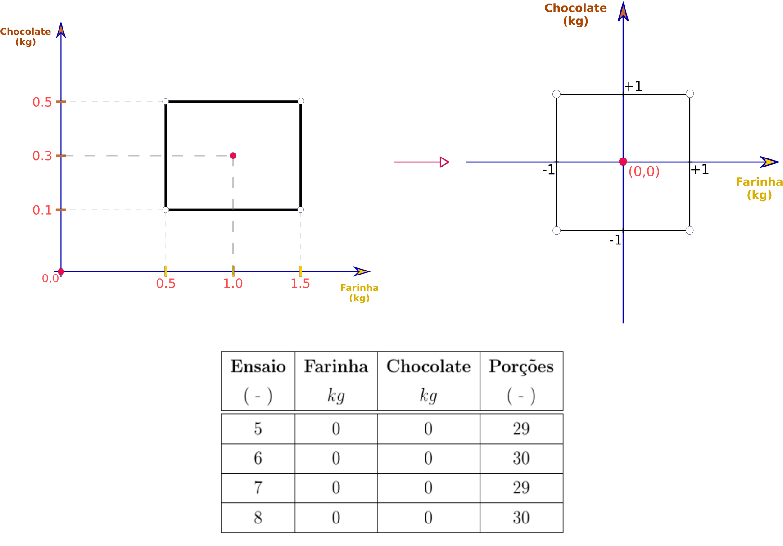

In [24]:
centro = np.array([ [0,0,29],
                    [0,0,30],
                    [0,0,29],
                    [0,0,30],])

In [25]:
centro_dataframe = pd.DataFrame(centro, columns = ['Farinha', 'Chocolate','Porcoes'], index = [4,5,6,7])

In [26]:
centro_dataframe

,Farinha,Chocolate,Porcoes
4,0,0,29
5,0,0,30
6,0,0,29
7,0,0,30


In [27]:
experimento = experimento.append(centro_dataframe)

In [28]:
experimento

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49
4,0.0,0.0,29
5,0.0,0.0,30
6,0.0,0.0,29
7,0.0,0.0,30


### Análise de significância estatística

In [30]:
modelo = smf.ols(data = experimento, formula = 'Porcoes ~ Farinha + Chocolate + Farinha:Chocolate')

In [31]:
modelo_ajustado = modelo.fit()

In [32]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     45.21
Date:                Sun, 26 Jun 2022   Prob (F-statistic):            0.00152
Time:                        16:46:46   Log-Likelihood:                -14.155
No. Observations:                   8   AIC:                             36.31
Df Residuals:                       4   BIC:                             36.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.8750      0.71

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


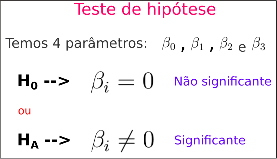

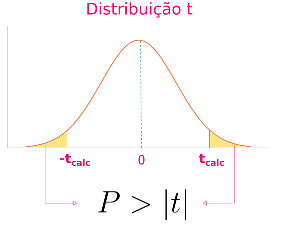

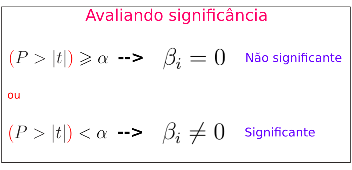

### Teste de significância estatística usando o t

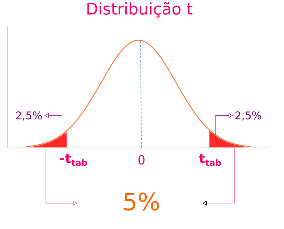

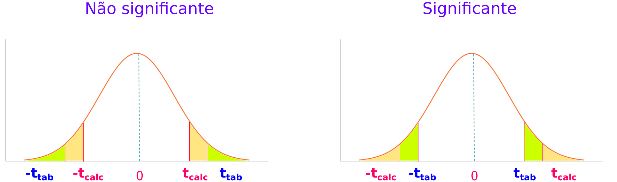

In [33]:
t_valores = modelo_ajustado.tvalues

In [34]:
t_valores

Intercept            43.494275
Farinha              10.708252
Chocolate             4.233495
Farinha:Chocolate     1.743204
dtype: float64

In [35]:
nome= t_valores.index.tolist()

In [36]:
nome

['Intercept', 'Farinha', 'Chocolate', 'Farinha:Chocolate']

In [37]:
from scipy import stats

In [38]:
distribuicao  = stats.t(df = 4)

In [39]:
distribuicao.ppf(q = 1 - 0.025)

2.7764451051977987

In [40]:
limite = [distribuicao.ppf(q = 1 -0.025  )]*len(nome)

In [41]:
limite

[2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987]

### Plotando o gráfico

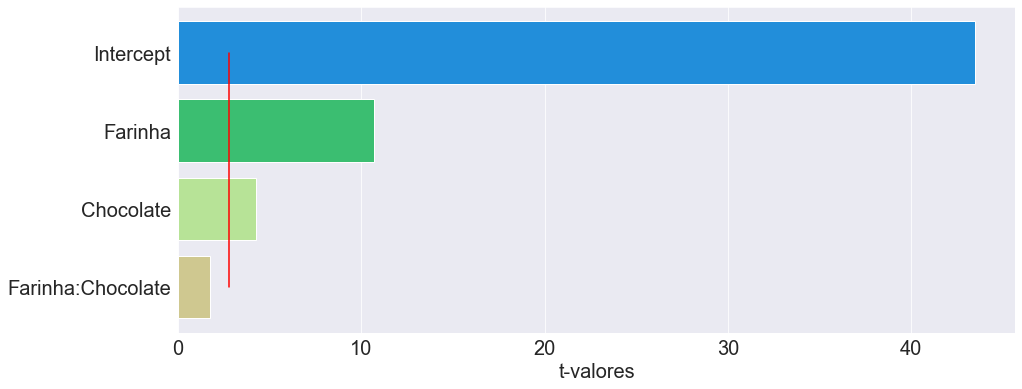

In [42]:
pareto = sns.barplot(x = t_valores, y = nome)
pareto.figure.set_size_inches(15,6)
pareto.tick_params(labelsize = 20)
pareto.set_xlabel('t-valores', fontsize = 20)
pareto.plot(limite, nome, 'r')

### Propondo um novo modelo

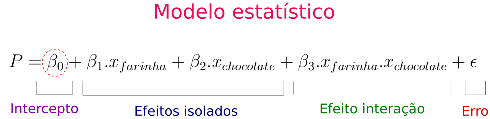

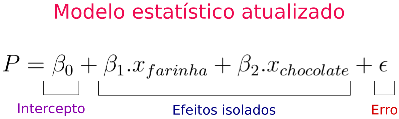

In [43]:
modelo_2 = smf.ols(data = experimento, formula = 'Porcoes ~   Farinha + Chocolate')

In [44]:
modelo_ajustado_2 = modelo_2.fit()

In [45]:
print(modelo_ajustado_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Sun, 26 Jun 2022   Prob (F-statistic):           0.000571
Time:                        17:03:07   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Gráfico Padronizado de Pareto do novo modelo

In [46]:
t_valores = modelo_ajustado_2.tvalues

In [47]:
t_valores

Intercept    36.658022
Farinha       9.025173
Chocolate     3.568092
dtype: float64

In [48]:
nome = t_valores.index.tolist()

In [49]:
nome

['Intercept', 'Farinha', 'Chocolate']

In [50]:
distribuicao = stats.t(df = 5)

In [51]:
distribuicao.ppf(q = 1 - 0.025)

2.5705818366147395

In [52]:
limite = [distribuicao.ppf(q = 1 - 0.025)]*len(nome)
limite

[2.5705818366147395, 2.5705818366147395, 2.5705818366147395]

### Plotando o gráfico

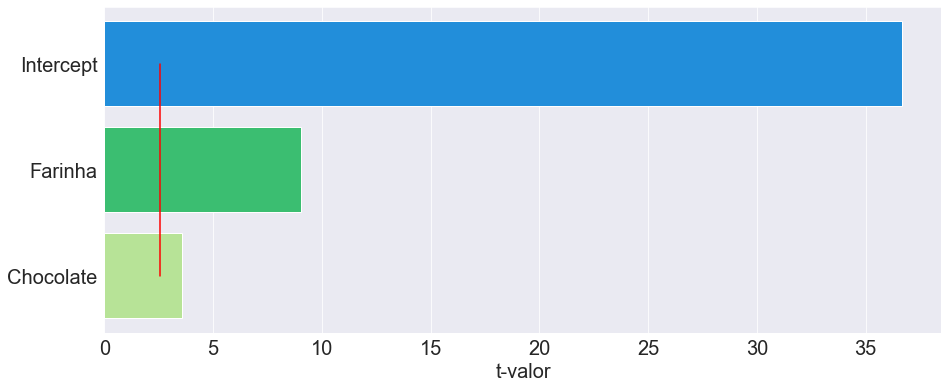

In [53]:
pareto = sns.barplot(x = t_valores, y = nome)
pareto.figure.set_size_inches(15,6)
pareto.tick_params(labelsize = 20)
pareto.set_xlabel('t-valor', fontsize = 20)
pareto.plot(limite, nome, 'r')

### Preditos por observados

In [54]:
observados = experimento['Porcoes']

In [55]:
observados

0    19
1    37
2    24
3    49
4    29
5    30
6    29
7    30
Name: Porcoes, dtype: int64

In [56]:
preditos = modelo_ajustado_2.predict()

In [57]:
preditos

array([15.875, 37.375, 24.375, 45.875, 30.875, 30.875, 30.875, 30.875])

In [58]:
import matplotlib.pyplot as plt

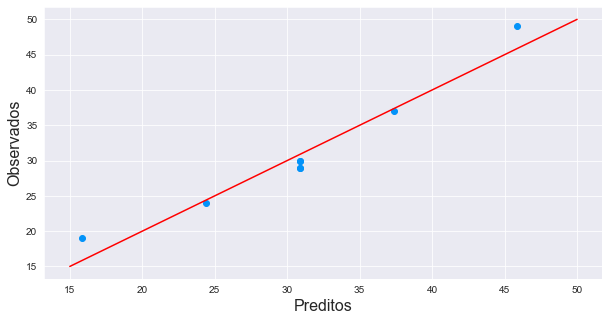

In [59]:
plt.figure(figsize = (10,5))
plt.xlabel('Preditos', fontsize = 16)
plt.ylabel('Observados', fontsize = 16)

#linha de guia
x = np.linspace(start = 15, stop = 50, num = 10)
y = np.linspace(start = 15, stop = 50, num = 10)
plt.plot(x,y, 'r')

#comparacao 
plt.scatter(preditos, observados)
plt.show()

In [63]:
print(modelo_ajustado_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Sun, 26 Jun 2022   Prob (F-statistic):           0.000571
Time:                        17:08:35   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

### Explorando o modelo

In [61]:
parametros = modelo_ajustado_2.params

In [62]:
parametros

Intercept    30.875
Farinha      10.750
Chocolate     4.250
dtype: float64

### Definindo a função

In [64]:
def modelo_receita(x_f, x_c):
    
    #limite 
    limite_normalizado = [-1,+1]   
    limite_farinha = [0.5,1.5]   
    limite_chocolate = [0.1,0.5]
       
    #Converter     
    x_f_convertido = np.interp(x_f, limite_farinha, limite_normalizado)    
    x_c_convertido = np.interp(x_c, limite_chocolate, limite_normalizado)
       
    porcoes = parametros['Intercept'] + parametros['Farinha']*x_f_convertido  + parametros['Chocolate']*x_c_convertido
    return round(porcoes)

In [65]:
modelo_receita(0.6,0.1)

18

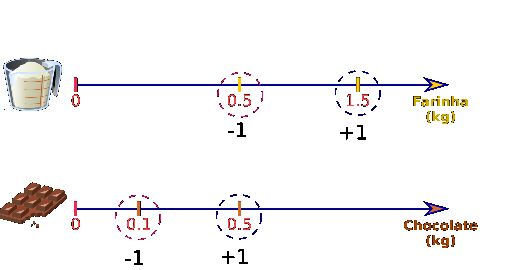

### Mapa de cores

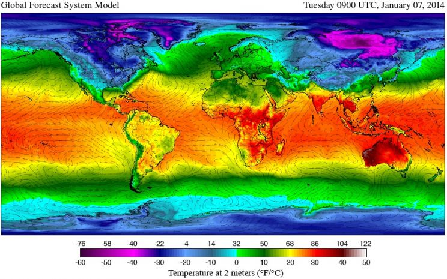

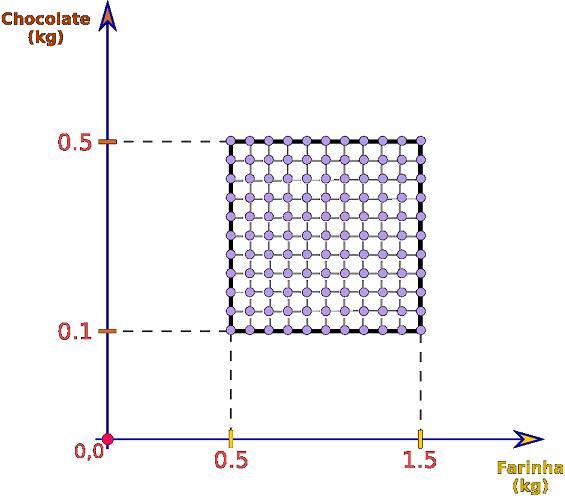

In [66]:
x_farinha = np.linspace(start = 0.5, stop = 1.5, num = 10)
x_farinha

array([0.5       , 0.61111111, 0.72222222, 0.83333333, 0.94444444,
       1.05555556, 1.16666667, 1.27777778, 1.38888889, 1.5       ])

In [67]:
x_chocolate = np.linspace(start = 0.1, stop = 0.5, num = 10)
x_chocolate

array([0.1       , 0.14444444, 0.18888889, 0.23333333, 0.27777778,
       0.32222222, 0.36666667, 0.41111111, 0.45555556, 0.5       ])

In [68]:
pontos = []

for cont1 in x_farinha:
    temp = []
    for cont2 in x_chocolate:  
        temp.append(modelo_receita(cont1, cont2))  
    pontos.append(temp)     

### Construindo a superfície de resposta

In [69]:
import matplotlib.cm as cm 

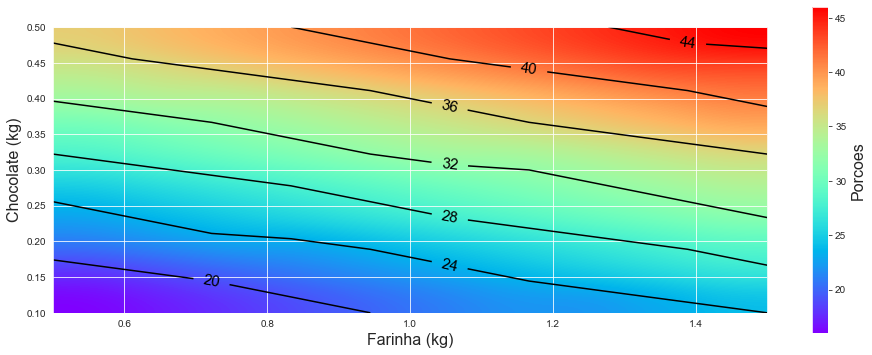

In [70]:
#base
plt.figure(figsize = (16,6))
plt.xlabel('Farinha (kg)', fontsize = 16)
plt.ylabel('Chocolate (kg)', fontsize = 16)

#Mapa de cores 
mapa_cor = plt.imshow(pontos, origin = 'lower',  cmap = cm.rainbow, interpolation= 'quadric', extent = (0.5,1.5, 0.1,0.5))

#Barra de cor
plt.colorbar().set_label('Porcoes', fontsize = 16)

#linha 
linhas = plt.contour(x_farinha, x_chocolate, pontos, colors = 'k', linewidths = 1.5)
plt.clabel(linhas, inline = True, fmt = '%1.0f', fontsize = 15.0 , inline_spacing = 10)
plt.show()